In [4]:
from PIL import Image, ImageStat
import numpy as np
import matplotlib.pyplot as plt
import random
import cv2 as cv

In [11]:
img1a = cv.imread('06.cores/Image_(1a).jpg')
img1b = cv.imread('06.cores/Image_(1b).jpg')
img2a = cv.imread('06.cores/Image_(2a).jpg')
img2b = cv.imread('06.cores/Image_(2b).jpg')
img3a = cv.imread('06.cores/Image_(3a).jpg')

In [36]:
def getMinMax(arr):
    # return [min(arr), max(arr)]
    return [0, 255]
    
def histogram(arr):
    h_arr = np.zeros(256)
    g_arr = ["" for x in range(256)]


    for x in range(len(arr)):
        h_arr[arr[x]] += 1


    max_arr = max(h_arr)
    for x in range(len(h_arr)):
        g_arr[x] = (str(x) + "\t: " + str("|" * int((h_arr[x] * 100)/int(max_arr)) + "\n"))


    return [h_arr, g_arr, getMinMax(arr)]


def printHistogramTxt(save_path, g_arr, p_min_max):
    with open((save_path.split(".")[0] + "_histogram.txt"), "w") as text_file:
        text_file.write("Histograma da imagem: " + save_path + "\n\n")
        for x in range(len(g_arr)):
            text_file.write(g_arr[x])


def printHistogramGraph(save_path, h_arr):
    plt.bar([x for x in range(256)], h_arr)
    plt.title("Histograma")
    plt.xlabel("Pixel")
    plt.ylabel("Frequência")
    plt.grid(True)
    plt.savefig(save_path.split(".")[0] + "_histogram.jpg")
    plt.clf()

### Alpha = constraste
### Beta = brilho
### np.clip = (a, b, c) -> a = array com elementos para serem limitados; b = limite inferior; c = limite superior
### Exemplo = Se um intervalo de [2, 5] for determinado, todos os valores menores que dois se tornam 2 e todos os valores maiores que 5 se tornam 5.

In [34]:
def brilho(alpha, beta, image):

    new_image = np.zeros(image.shape, image.dtype)

    for y in range(image.shape[0]):
        for x in range(image.shape[1]):
            for c in range(image.shape[2]):
                new_image[y,x,c] = np.clip(alpha*image[y,x,c] + beta, 0, 255)

    return new_image

# Clarear

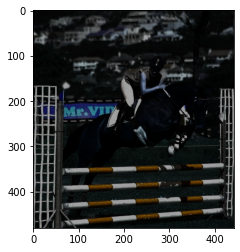

In [17]:
# cv.imshow("original", img1a)
plt.imshow(img1a)
plt.show()

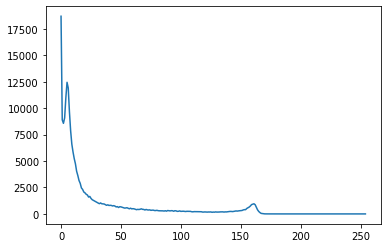

In [39]:
# calculate frequency of pixels in range 0-255
hist = cv.calcHist([img1a],[0],None,[255],[0,255]) 
plt.plot(hist)
plt.show()

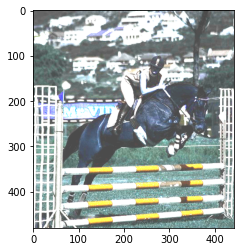

In [32]:
# cv.imshow("Imagem clareada", clarear(1.0, 50, img1a))
img_clarear = brilho(5.0, 75, img1a)

plt.imshow(img_clarear)
cv.imwrite('06.cores/results/New_Image_(1a).jpg', img_clarear)
plt.show()

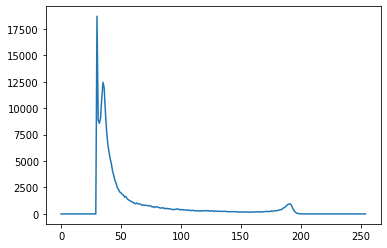

In [40]:
hist_clarear = cv.calcHist([img_clarear],[0],None,[255],[0,255]) 
plt.plot(hist_clarear)
plt.show()

# Escurecer

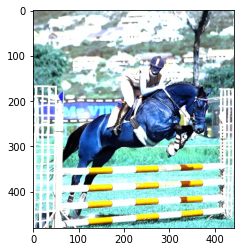

In [22]:
plt.imshow(img1b)
plt.show()

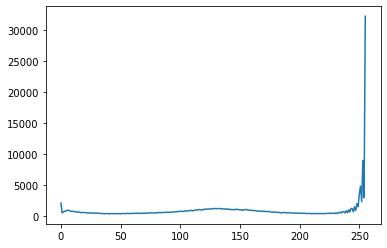

In [41]:
hist_1b = cv.calcHist([img1b],[0],None,[256],[0,256]) 
plt.plot(hist_1b)
plt.show()

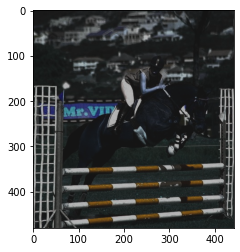

In [44]:
img_escurecer = brilho(1.0, 20, img1a)

plt.imshow(img_escurecer)
cv.imwrite('06.cores/results/New_Image_(1b).jpg', img_escurecer)
plt.show()

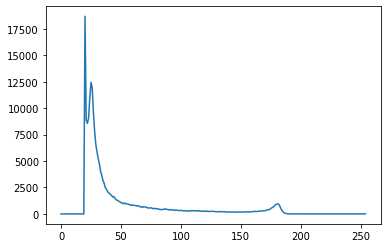

In [45]:
hist_escurecer = cv.calcHist([img_escurecer],[0],None,[255],[0,255]) 
plt.plot(hist_escurecer)
plt.show()